# Dimensionality Reduction - Linear cases

# PCA

Principal Component Analysis is a dimensionality reduction algorithm. The main steps of PCA are:

- **standardization**: to standardize the range of the continuous variables so that each of them contribute equally to the analysis. A common way to do that is by computing Z-score: $z = \frac{\text{data } - \text{ mean}}{\text{standard deviation}}$; this way all the data will have mean zero and standard deviation one.

- **covariance matrix**: its computation is useful in order to understand how variables vary from the mean with respect to each other. In other words, to understand if any data is correlated: if that is the case, there is going to be some information redundancy. So, the covariance matrix allows to see how variables covariate (they could be positive or negatively correlated).

- **extract eigenvalues and eigenvectors**: this is the step in which principal components are computed. PCs are new variables constructed as linear combinations of the starting variables, in such a way that they are uncorrelated and carrying the highest possible variance. PCA builds up new variables (PCs) where the first ones are those carrying most of the variance, so that each subsequent PC carries less variance than the previous one. So, the aim is to reduce dimensionality while keeping most of the explained variance. The first PC is found maximizing the variance (i.e. finding the eigenvector associated to the largest eigenvalue). The following ones are computed in the same way, but they have to be uncorrelated (orthogonal) to the previous ones.

- **data 'recasting'**: finding PCs does not change the actual data, which, in fact, it is still represented in terms of the original axes. So, in this step, data has to be reoriented from the original axes to the one represented by the PCs. This is done by multiplying the transpose of the original data by the transpose of the 'feature vector' (which is the matrix formed by the previously selected eigenvectors).

In practice, PCA is computed by three possible methods:

1. **Covariance**, used when data have similar scales;


2. **Correlation**, used when data have different scales;


3. **Singular Value Decomposition**, more general purpose.

**PROS**:

- It is good at extracting signal from noise
- Computationally inexpensive (time wise)
- Good for linear data

**CONS**:

- Not appropriate for non-linear data
- Variables are less interpretable after transformation
- Data standardization is required
- Information loss, even if PCA tries to maximize the variance, the number of PCs has to be selected with care.

### PCA > TSNE, in which sense:

- PCA is deterministic, while TSNE is not.
- TSNE do not represent global structure accurately, but local structure according to neighbors points. In a representation's perspective TSNE is better, but at a level of interpretability, PCA is way better, this is because is just a rotation startinf from the initial covariance matrix with the eigenvectors representing a new axial system.
- TSNE is not learning a function from the original space to the new (lower-dimensional) space; this is a problem if there's the will to apply the algorithm to new, and unseen, data.
- TSNE does not deal with incomplete data (neither PCA is able to do that, at least not in its classical form, but extensions of PCA, such as probabilistic PCA, allow to do that).

### PCA > MdS

An example where PCA outperforms MdS is in the dataset USArrest. In this dataset the number of arrests per 100.000 residents within the three most common categories of crime is portrayed (Assault, Murder, Rape); also the population density for each city is taken into account. Here is possibile to see that the first loading vector places approximately equal weight to the categories of crime and less weight on the density of population in the cieties. The second loading vector places most of its weight on the density of population and less on the other features. The categories of crime are located close to each other, and the population density variable is far from the others. This may indicate that the categories of crime are correlated, in fact states with high murder rates also have high assult and rape rates. Whil the poupulation density is less correlated with the other variables.

### PCA first practical example

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from seaborn import color_palette
from matplotlib.lines import Line2D

In [3]:
#Load MNIST dataset

mnist = fetch_openml('mnist_784')

MNIST is divided in ```data``` (which contains pixel for each image) and ```target``` (label indicating the real number associated to the image 0-9)

In [4]:
X = mnist.data / 255
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


Convert the matrix ```X``` and the vector ```y``` in a Pandas DataFrame:

In [5]:
feat_cols = [i for i in X.columns] #name of the columns (from pixel1 to pixel784)

df = pd.DataFrame(X)
df['y'] = y
df['label'] = df['y'].apply(lambda i : str(i)) #transform each y value, from an integer into a string

print(f'Size of the DataFrame: {df.shape}')

Size of the DataFrame: (70000, 786)


In [6]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


Since the dataset is sorted by y labels, it's wise to shuffle it

In [7]:
np.random.seed(42)

df_shuffled = df.sample(frac = 1)

In [8]:
pca = PCA(n_components = 3)

#we use featcol of df, since it does not contain y
pca_result = pca.fit_transform(df[feat_cols].values) #train the model and apply it to the testing data in one shot (since train and test data are the same in this case)
df['pc_one'] = pca_result[:, 0]
df['pc_two'] = pca_result[:, 1]
df['pc_three'] = pca_result[:, 2]

print(f'Explained variation per principal component {pca.explained_variance_ratio_}')

Explained variation per principal component [0.09746116 0.07155445 0.06149531]


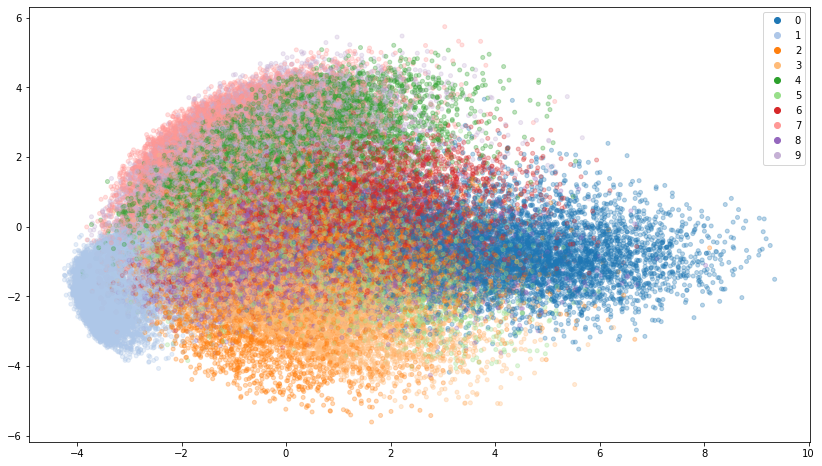

In [11]:
colors = color_palette('tab20')

fig = plt.figure(figsize = (14, 8))

plt.scatter(x = df.pc_one, y = df.pc_two, s = 16, color = [colors[i] for i in df.y.transform(lambda x : int(x))],
            alpha = 0.3)

custom_legend = []

for i in sorted(df.y.transform(lambda x : int(x)).unique()):
    custom_legend.append(Line2D([0], [0], marker = 'o', color = colors[i], label = i, markersize = 6, linewidth = 0))


plt.legend(handles = custom_legend)

plt.show()

equivalently:

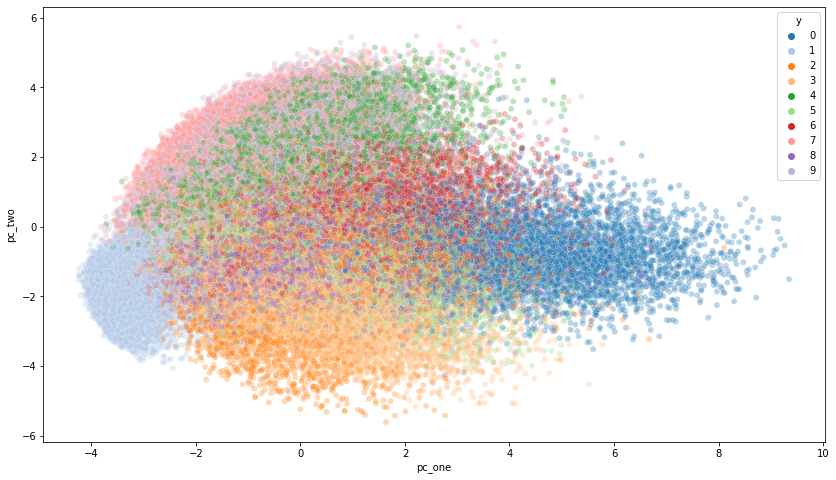

In [141]:
import seaborn as sns

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df.pc_one, y = df.pc_two, hue = df.y,
           palette = sns.color_palette('tab20', 10),
           legend = 'full',
           alpha = 0.3)

plt.show()

## PCA second example

In [214]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [218]:
breast = load_breast_cancer()

X = breast.data
y = breast.target

print(X.shape, y.shape)

(569, 30) (569,)


In [252]:
feat_cols = [i for i in breast.feature_names] #name of the columns (from pixel1 to pixel784)

df = pd.DataFrame(X, columns = feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i : str(i)) #transform each y value, from an integer into a string

print(f'Size of the DataFrame: {df.shape}')

Size of the DataFrame: (569, 32)


In [253]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


In [254]:
np.random.seed(42)

df_shuffled = df.sample(frac = 1)

In [272]:
pca = PCA(n_components = 2)

#we use featcol of df, since it does not contain y
pca_result = pca.fit_transform(df[feat_cols].values) #train the model and apply it to the testing data in one shot (since train and test data are the same in this case)
df['pc_one'] = pca_result[:, 0]
df['pc_two'] = pca_result[:, 1]

print(f'Explained variation per principal component {pca.explained_variance_ratio_}')

Explained variation per principal component [0.98204467 0.01617649]


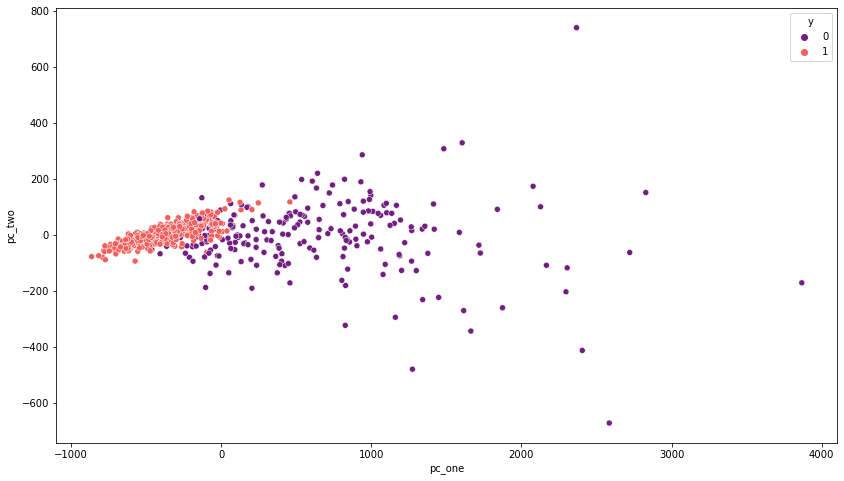

In [275]:
import seaborn as sns

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df.pc_one, y = df.pc_two, hue = df.y,
           palette = sns.color_palette('magma', 2),
           legend = 'full')

plt.show()

## Multidimensional Scaling (MDS)

Multidimensional Scaling is a family of dimensionality reduction algorithms. *MDS* tries to find an embedding of n objects into a r-dimensional euiclidean space $R^n$ in order to preserve (a function of) the distances or similarities - depending on the chosen object function - between the original objects. In this sense, MDS is a derivation from PCA, whose objective is not to maximize the variance, but trying to keep the distance between points in the projected space as closer as possible to the original distance in the original space.

*MDS*'s typical distance functions are:

- **classical mds**, also known as Pricipal Coordinates Analysis (*PCoA*), it measures the original distances between objects and the loss function to minimize is the **strain** function. If there exists a space $R^p$ where all the original distances between objects are preserved, the distance *d* is called euclidean. In this case the solution is deterministic (there is an analytic solution). Classical MDS is optimal for euclidean input data and when the inner products matrix has non-negative eigenvalues (i.e. positive semidefinite), it is fast in its execution, may not work very well if the inner products matrix has negative eigenvalues (in practice it may be used anyway).


- **metric mds**, it is a superset of classical MDS, so that it generalizes the optimization procedure to other kind of loss functions. A popular function to minimize is called **stress** and it involves a function of the original distances. In metric mds we can find **Sammon mapping** that is able to preserve the small $d_{ij}$ giving them a greater degree of importance in the fitting procedure that for larger $d_{ij}$. With respect to classical *MDS*, Sammon mapping better preserves inter-distances for smaler dissimilarities, while proportionally squeezes the inter-distances for larger dissimilarities.


- **non-metric mds**, it finds a non-parametric monotonic relationship between the dissimilarities in the item-item matrix and the Euclidean dsitances between the items; it also finds the location of each item in the low-dimensional space. In this case, dissimilarities are known only by their rank order (so, their the spacing between succesively ranked dissimilarities is unavailable or simply not interesting for the kind of data); the function is implicitly defined as a regression curve and it preserves the order of d, without caring about the actual values. A common algorithm in non-metric MDS is Kruskal mds. In other words, it is possibile to say that with non-metric MDS absolute values are not considered as meaningful, only the ranking is important, so that MDS tries to find a low-dimensional representation that respects the ranking of distances. Non-metric MDS Fulfills a clear objective without many assumptions (just minimize stress), results do not change with rescaling or monotonic variable transformation, it works even if starting just from ranking information. By the way, it is slow in large problems, usually it is able to found a local (not global) optimum.

In metric and non-metric case, the process is given by optimization (deteriministic solution is not feasible).

### Example of MDS




- Classical MDS: As an example we can take geographic data, like a dataset representing the approximate road distances between cities. MDS may provide a 'map' of their relative locations in 2d - even if with some distortions. In these cases, where data is not coming from a Euclidean space, negative eigenvalues may be expected (differently from PCA); that's not a problem, since changing the signs brings a conventional representation in the orientation of the cities. This happens because the extracted components have an absolute meaning. This way it is possibile to get, just starting from the road distances of cities, an good approximation of the real map under the longitudes and latitudes coordinates. So, it is possibile to state that in cases like these, MDS can determine, with a certain degree of accuracy, the structure of the dataset, just based on the concept of mutual distances.


- Non-metric MDS: In the study of Ekman (1954), 14 colors have been picked up, differring only in their hue (wavelength), and their similarity is judged through an interobserver agreement (IOA) between 31 people, in a scale from 0 up to 5. What is obtained is a (dissimilarity) matrix pointing out how much colors are correlated each others. Values have also been scaled in order to reduce their range in 0-1, so that 0 corresponds to 0 (no observer agrees on the pair of colors being similar) and 1 corresponds to 5 (all the observers agrees on the pair of colors being similar). Therefore, dissimilarities are easily obtained by 1 - the similarity value. Through non-metric MDS 14 points (representing each color) are projected in two dimension, so that the distances expressed in the aforementioned dissimilarity matrix are mostly preserved in the new space. What is astonishing about this is that the projection resembles the color wheel. As in this case, non-metric MDS involves ranking rather than proper distances.


### When only non-metric MDS is adequate wrt other kind of MDS

In the case of a dissimilarity matrix, which is not a distance matrix, classical MDS gives inconsistents results. In these cases Non-metric MDS is highly suggested over classical MDS. To have a general theoretical grip: in all the cases/experiments in which an interobserver agreement (IOA) between people, instead of actual distances, is used in the construction of the dissimilarity matrix. As a practical example: The Ekman colors study, the perception of similarity between different sports, ...


### Difference between PCA and MDS

While PCA aims at describe the principal components (linear combinations) of a dataset that is able to explain the largest amount of variation, MDS, instead, aims at constructing a reduced dimensionality space so that the projected points preserve the mutual distances, inherited from the original dataset: the distance they have in the original dataset are - more or less - preserved in the projected space. When is this useful? In the case of objects of very different nature, for which there is no possible description in a feature space; examples of such cases are objects like drugs, images, trees or other complex objects without any obvious coordinates in $R^n$. Despite that, a dissimilarity matrix can be constructed, that explains the mutual separation between these objects.
Differently from PCA, MDS can produce some negative eigenvalues and this is due to the fact that the data do not come from a Euclidean space.

# Dimensionality reduction - Non linear cases

## T-SNE

A problem of **PCA** is that it targets the dimensionality of the data and tries to preserve large pairwise distances in the map, but cannot catch the real structure of the data. So PCA is good at catching large variation in the data.
For example, PCA is able to explain 90% of the variance of the swiss roll data, however the projection is not accurate on representing the real structure (i.e. real distances are not coherent). That is why algorithms like T-SNE are useful.


T-Distributed Stochastic Neighbor Embedding may be seen as a 'solution' to this problem. The main idea behind TSNE is that what is reliable in dimensionality reduction are the very small euclidean distances between neighbouring points, so what is actually determining the overall structure of a dataset - and also conditioning its projection - is the concept of neighbourhood.


**Brief description**:

To understand better this neighbouring concept, let us suppose to have a multidimensional dataset, the objective here is to use a Gaussian function in order to weight the distances of the neighbouring points, for each data entry. So, a "circle" is drawn around each data, such that the closer a data is to the circle the smaller the distance is. Clearly, depending on the radius of the circle, the number of catched neighbours increases or decreases. The idea is to construct a smoothing distance function, on a space that may not have a distance function in order to construct the concept of metric neighbourhood.

Let us take into account a dataset lying in an high-dimensional space, the aim of TSNE is that of constructing a map that projects the original high-dimensional space into a new and lower-dimensional space. In order to do so, is necessary to properly define the distances on the two spaces. In the original (high-dimensional) space we define a Gaussian distance between each pair of points:


$$
p_{ij} =  \frac{\text{exp } (-\frac{||x_i - x_j||^2}{2\sigma^2})}{\sum_{k \neq l} \text{exp} (-\frac{||x_k - x_l||^2}{2\sigma^2})}
$$


which is the exponential of the inverse of the norm of the vectors $x_i$ and $x_j$ (divided by $2\sigma^2$), this quantity is then averaged by the sum of the exponential of the inverse of all the possibile distances (divided by $2\sigma^2$) in the dataset.

On the low-dimensional space, the set up distance is given by the t-student distribution:

$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}
$$


which is one plus the inverse of the norm of the difference between the two images, squared; and this quantity is then averaged by the sum of all possibile mutual distances between all the projected points of the dataset.


The core of TSNE is finding the minimum of the so-called *Kullback-Leiber* divergence function:

$$
C = \text{KL(P || Q)} = \sum_{i=1}^{n} \sum_{j=1}^{n} p_{ij} \text{ log }\frac{p_{ij}}{q_{ij}}
$$


**Novelties of TSNE wrt previous algorithms**:

- it uses joint, instead of conditional, probabilities; this introduces simmetry in the formulation of the problem and optimizing KL function is computationally much simpler.

- In the previous attempts of using this kind of solution, the Gaussian modelling was used on both the original (high-dimension) and the target (lower-dimension) space. TSNE, instead, uses t-distribution on the low-dimensional space which help on the solution of the problem; that is because of the heavy tails of such distribution that alleviate both the *optimization problem* and the *crowding problem*:

    1. **The optimization problem** consists in the 'burden' of solving the KL problem.
    2. In order to understand the **crowding problem** it has to be taken into account the fact that the volume of a sphere centered on a given data point $i$ scales as $r^m$ (r is the radius and m the dimensionality of the sphere); if we want to model accurately the small distances, most of the points that are at a moderate distance from datapoint $i$ will have to be placed much far away in the two-dimensional map. In few words, this problem consists in the impossibility to preserve the distance in all neighbourhood. So, using the t-student distribution, this problem is alleviated by correcting the volume differences between both spaces. and this happens because t-student distribution allows a moderate distance in the high-dimensional space to be preserved by a much larger distance in the map, in this way the unwanted attractive forces between map points that represent moderately dissimilar data points are eliminated. In order to fully understand this point, it has to be remembered that the ma's representation of joint probabilities is intrinsically invariant to changes in the scale of the map, for map points that are far apart.
    
    
**Optimization step**:

Since the KL divergence function is not symmetric, different types of error in the pairwise distances in the low-dimensional map are not weighted equally. In fact, there is a large cost for using widely separated map points to represent nearby data points (i.e. a big penalty is paid if distanciating too much points that are actually close), while there is a small cost to closely map those points that are widely separated. The solution to this problem is found using the *gradient descent* algorithm used to find the minimum of a function (i.e. consecutive steps, proportional to the negative of the gradient of the function at the current point, are taken).


**TSNE optimization**:

$$
\frac{\delta C}{\delta y_i} = 4 \sum_j (p_{ij} - q_{ij})(y_i - y_j) (1 + ||y_i - y_j||^2)^{-1}
$$

this formula is called *n bodies elastic system* and what it does is repelling dissimilar data points that are modeled by a small pairwise distance in the low-dimensional representation; these repulsions, do not go to infinity though. There are two methods in order to ease these repulsions:

- **easy compression**, force the map points to stay close together at the start of the optimization, if they are modeled by a small pairwise distance. This is done adding an additional l2 penalty (square of the absolute value) to the cost function, that is proportional to the sum of squared distances of the map points from the origin.


- **early exaggeration**: multiply all the $p_{ij}$ distances in the original space by a constant, modeling the large $p_{ij}$ by fairly large $q_{ij}$; in this way, natural clusters tend to form tight widely separated clusters in the map.


**the perplexity hyperparameter**:

The only parameter that appear in the original formula of TSNE is the variance $\sigma_i$ for the high-dimensioanl Gaussian of $p_{ij}$. Of course there is not a unique optimal value $\sigma_i$ for all the data points in the dataset, that is because the density of the data is likely to vary. In dense regions, a smaller $\sigma_i$ is usually more appropriate than in sparse regions. In general, any particular value of $\sigma_i$ induces a different probability distribution $P_i$ that has an entropy which increases as $\sigma_i$ increases.

TSNE performs a binary search for all the value of $\sigma_i$ that produces a $P_i$ with a fixed perplexity that is specified by the user

$$
\text{Perp}(P_i) = 2^{H(P_i)} = 2^{\sum_jp_{ij} \text{log}_2 (p_{ij})}
$$

Perplexity can be interpreted as a smooth measure of the effective number of neighbors (typical values are between 5 and 50).

**Drawbacks of TSNE**:
- it does not output transformation. This is not giving back a map projecting the whole space where the dataset lies into the target dataset. That means that it is only mapping the specific points of the dataset.

- Stochastic, statistically based.

- The output space is hard to interpret in a geometrical point of view.

- the choice of the perplexity is critical to the results.

- Assessing different visualizations at different tuning of perplexity is needed in order to understand the underlying topology of the starting dataset.

- For extreme values of perplexity (and sometimes even not so extreme values) artifacts may appear.

- Altough TSNE does a very good job in clustering together points that have to stay together, the size of the cluster and also the distance between different clusters is not geometrically meaningful.

- Since KL optimization is a computational expensive algorithm, applying it to large datasets can take long time.



### Where TSNE > PCA and MDS

If we consider MNIST dataset, TSNE is way better wrt Sammon MdS. The cluster of different digits gets very well separated.
If we consider fashion-MNIST dataset, TSNE is way better than PCA.
If we consider the coil20 dataset, Sammon MdS is able to individuate some of the clusters, while TSNE is separating properly most of the classes (red, pink and black in particular).
If we consider the double swiss roll, which is the same as swiss roll, but with two layers, it is possible to see that PCA is able to explain 84% of the variance, but the two levels of the swiss roll are mixed together; the classical MdS has quite similar - and poor - results as the PCA; Sammon MdS is able to start differentiating the two layers of the roll; TSNE is definitely improving wrt the other algorithm, even if it is struggling and mixes up a bit the two layers.

## TSNE first example

Consider the datafile Leukemia.csv, collecting the expression of 7129 genes of 72 leukemia patients, belonging to 4 different classes: B-cell, T-cell, BM, BP, as indicated in the last column of the .csv file. Using the TSNE dimensionality reduction planar (2D) projection on the 7129 describing features, color the samples according to their calss and discuss if the 4 groups of patients can be well separated into two distinct groups in the projection.

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df['patient diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: patient diagnosis, Length: 569, dtype: object

In [10]:
df = pd.read_csv('Leukemia.csv')

            #n of dimensions
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 3000, random_state = 42) #tuning the hyperparameter: perplexity

tsne_results = tsne.fit_transform(df.iloc[:, :-1]) #removing the label columns

E:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.000s...
[t-SNE] Computed neighbors for 72 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 46926.011947
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.382633
[t-SNE] KL divergence after 1550 iterations: 0.147507


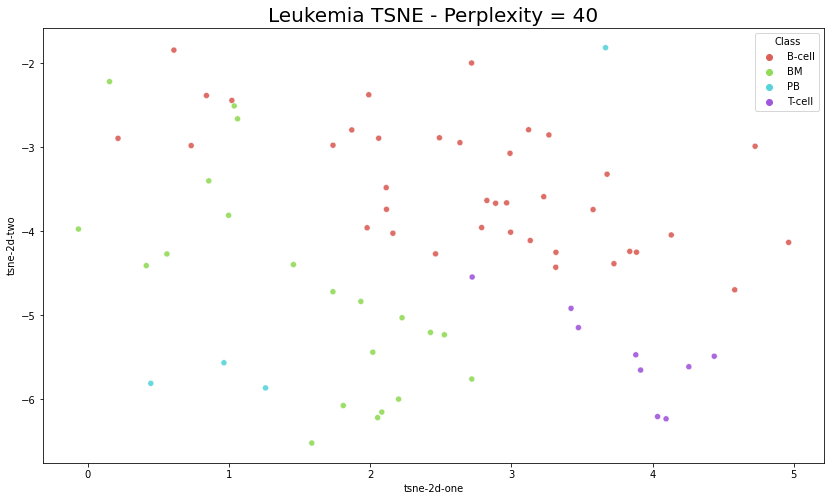

In [11]:
df['tsne-2d-one'] = tsne_results[:, 0] #first column
df['tsne-2d-two'] = tsne_results[:, 1] #second column

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df['tsne-2d-one'],
                y = df['tsne-2d-two'],
                hue = 'Class',
                palette = sns.color_palette('hls', len(df.Class.unique())),
                data = df,
                legend = 'full',
                alpha = 0.9)

plt.title('Leukemia TSNE - Perplexity = 40', size = 20)

plt.show()

**comment on the results**

Seems like B cells and T-cells can be clutered more or less in the same portion of space - to the right side - , while BM and PB cells seems to lie on the left side. Anyway clusters wrt to different labels are very sparse and not very condensed, also B-cell and BM tend not to be very well separated. Since is required to say whether the 4 classes are **well** separated in two groups, I would say they are not. They are kind of separated (left and right side).
Tuning the perplexity hyperparameter over 40 starts to show a uniform distribution of the points in the space, regardless of the class.

## TSNE second example

The Wisconsin Breast Cancer dataset incldes data of 569 breast cancer patients. In detail, first column is PatientID, second column is the DIagnosis (Malignant/Benignant), while the remaining columns 3-32 consists of 3 groups of 10 histological descriptors of tumoral cells. For each descriptor, its Average, Standard Error and Worst Case are listed. Using the 30 descriptor columns, project using TSNE the 569 patients on a 2D space and color them according to their diagnosis. Are the two different diagnoses well separated in the 2D space?

Repeat the same procedure using only the last 10 Worst Case columns: is the separation between diagnoses improving or worsening?

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [204]:
df = pd.read_csv('WisconsinBreastCancer.csv')

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 50, n_iter = 3000, random_state = 42)

tsne_results = tsne.fit_transform(df.iloc[:, 2:]) #all the columns except the first two

E:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 45.582839
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.921818
[t-SNE] KL divergence after 2550 iterations: 0.181463


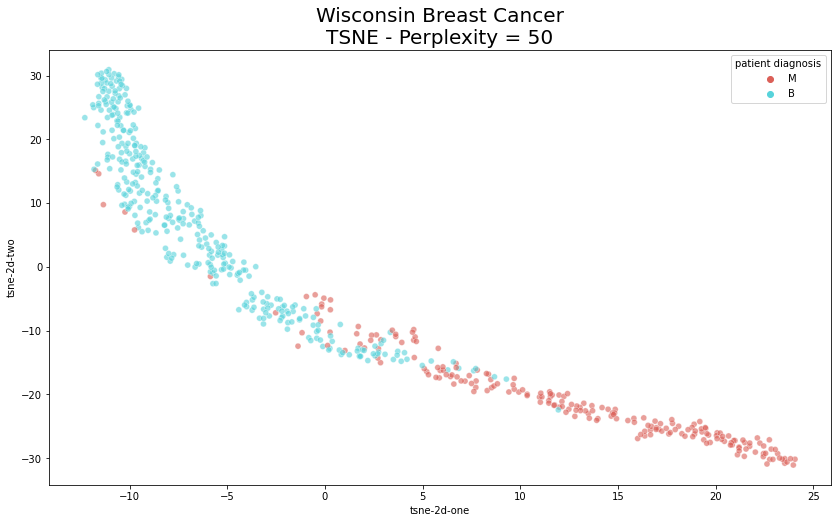

In [205]:
df['tsne-2d-one'] = tsne_results[:, 0] #first column
df['tsne-2d-two'] = tsne_results[:, 1] #second column

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df['tsne-2d-one'],
                y = df['tsne-2d-two'],
                hue = 'patient diagnosis',
                palette = sns.color_palette('hls', len(df['patient diagnosis'].unique())),
                data = df,
                legend = 'full',
                alpha = 0.6)

plt.title('Wisconsin Breast Cancer\nTSNE - Perplexity = 50', size = 20)

plt.show()

In [209]:
reduced = pd.read_csv('WisconsinBreastCancer.csv')

names = [reduced.columns[1]] + [i for i in reduced.columns[-10:]]

reduced = reduced[names]

reduced.iloc[:, 1:]

,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [234]:
tsne2 = TSNE(n_components = 2, verbose = 1, perplexity = 60, n_iter = 3000, random_state = 42)

tsne_results2 = tsne2.fit_transform(reduced.iloc[:, 1:]) #all the columns except the first one (diagnosis)

E:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 36.529045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.292629
[t-SNE] KL divergence after 2150 iterations: 0.113108


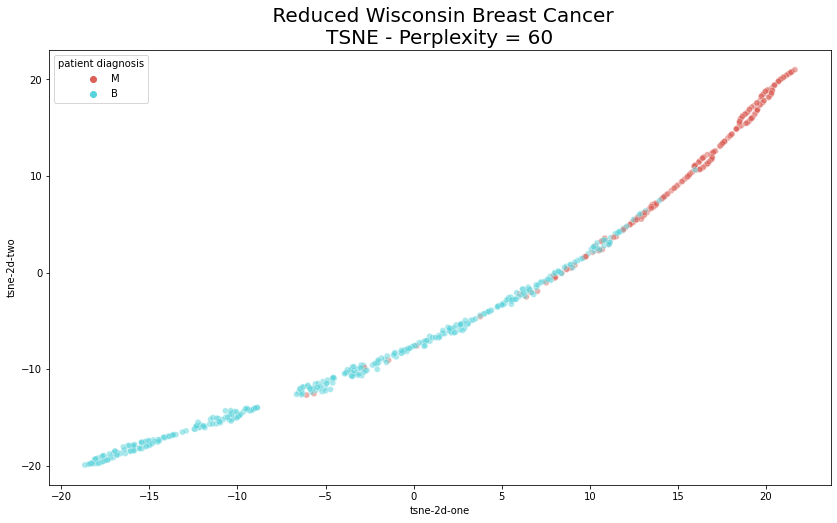

In [238]:
reduced['tsne-2d-one'] = tsne_results2[:, 0] #first column
reduced['tsne-2d-two'] = tsne_results2[:, 1] #second column

plt.figure(figsize = (14, 8))

sns.scatterplot(x = reduced['tsne-2d-one'],
                y = reduced['tsne-2d-two'],
                hue = 'patient diagnosis',
                palette = sns.color_palette('hls', len(reduced['patient diagnosis'].unique())),
                data = reduced,
                legend = 'full',
                alpha = 0.5)

plt.title(' Reduced Wisconsin Breast Cancer\nTSNE - Perplexity = 60', size = 20)

plt.show()

**comment**

Keeping all the dataset, TSNE does a good job separating the two classes of patients. But keeping into account just the last 10 columns is even better, there are very few overlapping of points belonging to different classes, so those are very well separated.

##### UMAP

Uniform Manifold Approximation and Projection is an algorithm for dimensionality reduction. The approach of this algorithm is very different with respect to TSNE, MdS and PCA (i.e. algebraic and geometrical). Currently UMAP is considered a the state of the art algorithm.

**Brief Description**

Similarly to TSNE, UMAP builds up a neighbourhood graph starting from the original space and then projects it into a lower dimensions space, but it does it in a very different way. So, broadly speaking, UMAP algorithm can be splitted in two part:

- graph construction (high-dimension)
- graph projection (low-dimension)

Each data point is transformed in a 0-simplex and each of them is connected to its neighbouring data points (other 0-simplices); through their connection, $k$ simplices ($k$ determines the dimension of the simplex) are going to be formed. This connection of simplices is called simplicial complex (or chech nerve), and it consists in the intersection between the simplices. Nerve theorem ensure that in this way - if the space is compact - the starting topology can be approximated.


**In the specific of a dataset**

To apply the above construction to a dataset, firstly an open cover is needed. If data lie in a metric space (a measure of distance exists), the open cover is just obtained by the balls centered in each data points (a 0-simplex is constructed for each data point): all the elements are open and they are covered, since their union includes all the data.
Now, starting from the 0-simplex, the nerve (graph) is constructed, building up $k$-simplices (on the plane up to 2-simplices).
If we just consider 0-simplices and 1-simplices we are taking into account just points and links between points, so that a dimensional reduction ca be obtained through a graph representaion.

Now, two problems arise:

- What is the optimal radius for each ball in the open cover? If the radius is too small, there are going to be too many connected components; if the radius is too large, there are going to be few high-dimensional simplices without any structure.

- If points are too scattered, the structure cannot be properly captured; if points are too dense, the cover generates a too high-dimensional nerve.

In the best case-scenario all the data points are uniformly distributed in the manifold. In this optimal case the radius has just to be half the average distance between points: this bring us a perfect open cover, without any gaps nor clumps.
In real cases this is very rare, so a solution has to be adopted:

UMAP adapts the notion of distance on the manifold so that all the points seems to be uniformely distributed. And this is done by stretching the space:

let us suppose to have a line with points lying on that non uniformely (e.g. a cluster of very close points each others). In order to make it uniformely distributed the space is bent (of course, in this way the dimensionality is raised). In order to do so, each point has its own distance function and a ball of radius one is selected according to that particular distance function. Thus, the unit ball about the point stretches to the $k$-th nearest neighbor of the point, where $k$ is the sample size used to approximate the local sense of distance. At this point we have a local metric and, starting from this, UMAP weights the edges of the graph according to the edge vertices distace (from simplicial complex to simplicial sets). In this way the previously constructed classical balls are transformed into fuzzy balls: the radius is not fixed, but a function in $[0, 1]$ that decreases while moving away from the center: $(1+ax^{2b})^{-1}$ (this is a possibile function to use for this purpose).

About the **fuzziness** of points: the points may end up being separated by the rest of the manifold. Local connectivity is introduced, so that the fuzziness start (or, equivalently the radius starts decaying) only after having reached the nearest neighbour. The focus here is in the difference in distances among nearest neighbors rather than the absolute distance, in this way is possibile to avoid the curse of dimensionality.

Since each point has its own metric, distances are not symmetric, that is: $\text{dist}(a, b) \neq \text{dist}(b, a)$. The solution is to define the fuzzy union of simplicial sets as the probability that at least one of the edge exists, thus ending with a single fuzzy simplicial complex (weighted graph).

Now the graph has to be projected in a lower-dimensional space while preserving the original manifold structure. This means deciding which $f(w_h, w_l)$ to optimize, where $w_h, w_l$ are the graph edges' wieghts in high and low dimension. Since $w_h, w_l$ can be though as Bernoulli random variables ($w$ exists with probability $p$ and does not exists with probability $1 - p$) the function to optimize is the cross-entropy:

$$
\sum_{e\in E} w_h(e) \text{ log}(\frac{w_h(e)}{w_l(e)}) + (1 - w_h(e)) \text{ log}(\frac{1-w_h(e)}{1-w_l(e)})
$$

where:

$e$ a given edge in all the edges $E$,

$w_h(e)$ the weight of the edge in high-dimension

$w_l(e)$ the weight of the edge in low-dimension


The formula can be seen as splitted in two components:


- $ w_l(e) \text{ log}(\frac{w_h(e)}{w_l(e)})$, is the attractive force between points when $w$ is large in high-dimension (it optimizes the clumps)

- $ (1 - w_h(e)) \text{ log}(\frac{1-w_h(e)}{1-w_l(e)})$, is the repulsive force between points when $w$ is small in high dimensions (it optimizes the gaps)


### Hyperparameters of UMAP

The three main ones are:

- **number of neighbors**: determines the number of points around a given point (i.e. the neigbors), in the local approximation of the manifold structure, used to construct the projecting space. Large values will preserve better the globla structure, losing the details of the local structures (and viceversa). This hyperparameters usually ranges in $[5, 50]$ with a sensible range in $[10, 15]$.

- **minimum distance**: controls how tightly the embedding is allowed to compress points together. Larger values ensure embedded points are more evenly distributed, while smaller values allow the algorithm to optimise more accurately with regard to local structure. Sensible values ranges in $[0.001, 0.5]$ with 0.1 being a reasonable default.

- **metric**: determines how distances are measured in the input space (common ones are Euclidean, Manhattan, ...). Also a custom function can be used.


### Example where UMAP works good

Taking into account the MNIST dataset, it is possibile to see that UMAP it is way better in separating the clusters of different digits, of course with respect to Sammon MdS, but also with respect to TSNE.
In fashion-MNIST, which is an even harder task with respect to classical MNIST, UMAP is able to cluster different objects even better wrt TSNE, and of course way better than PCA.


### UMAP > TSNE

- UMAP is faster due to its optimization and strong mathematical foundations (up to 10x speed, depending on the dataset).
- In terms of balance between global and local structure: UMAP is better at preserving the global structure, while inter-clusters relationships may be better in TSNE.
- UMAP works better in complex datasets.

A nice thing about **UMAP, wrt TSNE**, is that is possibile to construct a real projection of the space. While TSNE only maps points in the input space to project them in the target space. The UMAP function provides a real transformation map: not only the points of the dataset, but all the space where these points live are mapped in a totally new space. In practice, this means that is possibile to use a subset of the dataset to construct the map (train) and another subset (test) to project them (without mapping them).

### Practical example where UMAP > TSNE (not showed in lectures)

An interesting case study is the one provided by Max Noichl. In this case is easy to see the different results of data projections in the lower-dimensional space when performing both TSNE and UMAP. UMAP is able to preserve the global structure very well. TSNE needs a high perplexity - which requires long computational time - in order to start seeing the global structure emerging. Also, while TSNE projections may vary a lot depending on each individual run, UMAP is able to project data in a similar way regardless of the individual run.

In [1]:
import matplotlib.pyplot as plt

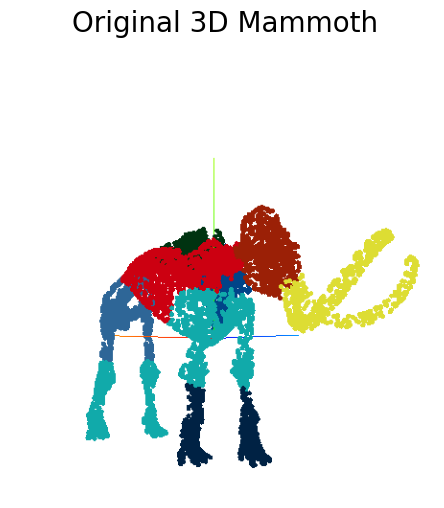

In [2]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6), dpi = 100)

img = plt.imread('original_mammoth.png')

for i in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[i].set_alpha(0)
    
plt.xticks([]), plt.yticks([])
    
plt.imshow(img)

plt.title('Original 3D Mammoth', size = 20)

plt.show()

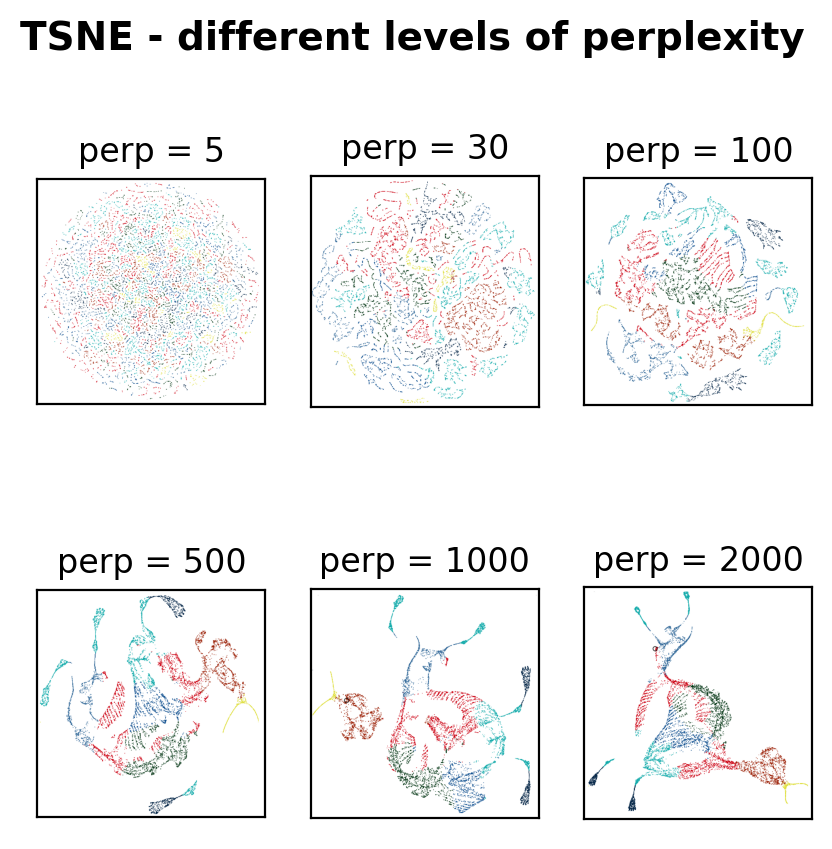

In [8]:
fig, ax = plt.subplots(2, 3, figsize = (5, 5), dpi = 200)

perp5 = plt.imread('perp5.png')
perp30 = plt.imread('perp30.png')
perp100 = plt.imread('perp100.png')
perp500 = plt.imread('perp500.png')
perp1000 = plt.imread('perp1000.png')
perp2000 = plt.imread('perp2000.png')

names = ['5', '30', '100', '500', '1000', '2000']

count = 0

for a, i in enumerate(ax):
    for b, j in enumerate(i):
        ax[a, b].imshow(eval(f'perp{names[count]}'))
        ax[a, b].set_title(f'perp = {names[count]}')
        ax[a, b].set_xticks([])
        ax[a, b].set_yticks([])
        
        count += 1
        


fig.text(x = 0.5, y = 0.95, s = 'TSNE - different levels of perplexity', ha = 'center',
        weight = 'bold', size = 14)


plt.show()

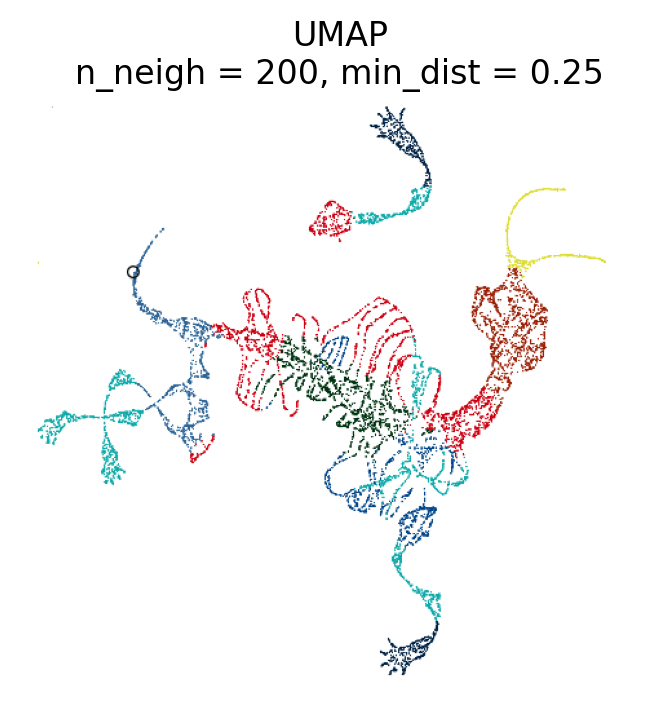

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4), dpi = 200)

umap = plt.imread('umap.png')

ax.imshow(umap)
ax.set_title('UMAP\nn_neigh = 200, min_dist = 0.25')
ax.set_xticks([]), ax.set_yticks([])

for i in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[i].set_alpha(0)

### Differences between UMAP and TSNE

TSNE uses just an hyperparameter (perplexity), while UMAP uses at least three of them. They both work starting on a graph construction before the projection, but this is done in different ways.


### UMAP > PCA

UMAP performs better than PCA if applied to huge and complex datasets such as the fashion MNIST. In a similar way, PCA is unable to perform good in the double swiss roll example. Nevertheless, PCA is still a valid method that can be used for many tasks where the space is linear.

## UMAP example

Consider the datafile [microbiome.csv](https://drive.google.com/file/d/102QNExepMMTOuIvqNBKrNRsVensEwOgo), collecting the abundances of 6696 bacterial species (OTU) of 675 patients. Prepare a set of at least 5 plots with the 2D projection of the dataset by using the UMAP algorithm, varying the number of neighbours parameter in the range 5-200 and the minimum distance parameter and discuss in details the different shapes resulting in the projected plots.

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=102QNExepMMTOuIvqNBKrNRsVensEwOgo')

,OTU0,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU6686,OTU6687,OTU6688,OTU6689,OTU6690,OTU6691,OTU6692,OTU6693,OTU6694,OTU6695
0,1.558520e-11,4.724120e-11,1.225880e-11,4.515660e-11,2.718290e-11,2.706710e-11,3.306490e-11,5.078730e-11,1.845710e-11,2.565747e-03,...,6.661360e-11,3.021640e-11,4.415210e-11,7.311330e-11,7.772160e-11,4.333640e-11,5.437370e-11,8.723940e-11,2.713500e-11,4.966000e-11
1,2.359220e-11,9.533200e-11,3.330680e-11,2.669130e-11,2.019270e-11,2.505580e-11,6.753770e-11,9.076440e-11,8.707380e-11,2.516360e-04,...,3.255580e-12,5.385290e-11,4.725960e-11,2.600370e-11,4.242660e-11,6.546480e-11,4.848670e-11,8.377660e-11,3.498560e-11,7.617720e-11
2,6.771010e-11,3.682960e-11,8.018540e-11,5.488950e-11,1.341180e-11,5.115210e-11,5.806820e-11,6.466670e-11,1.447080e-11,2.336449e-03,...,7.231020e-11,6.298250e-12,7.062920e-11,8.313000e-11,3.307660e-11,7.383310e-11,4.448790e-11,9.645520e-12,7.880280e-11,3.992640e-11
3,5.520270e-11,9.890760e-11,4.581380e-11,3.539770e-11,2.092110e-11,6.255510e-11,9.341670e-11,5.372400e-11,6.280840e-11,7.410150e-04,...,9.095820e-11,2.935560e-11,9.996590e-11,9.821790e-11,8.541320e-11,9.727770e-11,2.959570e-11,8.581660e-13,5.876120e-11,5.506230e-11
4,5.238120e-11,6.340330e-11,2.354280e-11,7.469650e-11,2.489830e-11,4.048870e-13,3.337430e-11,8.499950e-12,4.558400e-11,4.933400e-04,...,1.504300e-11,4.900990e-11,8.106680e-12,4.669770e-11,8.265580e-11,4.631170e-11,1.600100e-11,5.546980e-11,7.840300e-11,8.564610e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,4.247430e-11,1.406080e-11,9.074520e-11,3.257960e-11,4.646200e-11,4.361780e-11,7.980690e-11,1.049470e-11,3.906600e-11,4.644680e-04,...,5.103970e-11,4.585150e-11,9.281640e-11,1.449490e-11,4.060920e-12,3.054330e-11,7.129660e-11,9.447730e-11,9.238750e-11,9.595700e-11
671,1.034810e-11,1.621610e-11,2.990730e-11,5.520300e-12,2.976330e-11,2.250610e-11,6.362920e-11,8.706380e-11,1.573750e-11,9.016790e-11,...,2.155730e-11,5.992650e-11,6.944240e-11,8.926880e-13,3.493360e-11,9.504000e-11,7.293740e-12,5.148570e-11,6.420540e-11,6.783460e-11
672,3.440020e-11,9.718630e-11,1.379340e-11,1.248030e-11,1.572270e-11,5.661180e-13,5.494880e-11,5.007510e-04,8.707440e-11,7.840980e-11,...,7.605120e-12,5.094710e-11,1.178910e-11,4.806800e-11,3.732460e-11,5.721140e-12,8.027560e-11,4.168250e-11,2.579660e-11,5.988800e-11
673,5.155480e-11,8.816020e-11,4.396740e-11,2.091220e-13,2.292420e-11,9.814320e-11,2.528750e-12,8.308330e-11,4.793430e-11,7.744790e-11,...,1.173670e-11,8.479930e-11,5.295780e-11,3.520920e-11,5.199940e-11,8.510810e-11,5.678910e-11,5.082900e-11,9.205800e-11,9.932160e-12
